In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
import seaborn as sns

In [2]:
data = pd.read_csv('Assessors_Parcel_Data_2022.csv', low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head(5)

,PIN,ASMTYEAR,TAXYEAR,HOUSE_NO,STREET_NAME,UNIT_NO,ZIP_POSTAL,FORMATTED_ADDRESS,OWNERNM,TAXPAYER1,TAXPAYER2,TAXPAYER3,TAXPAYER4,PLAT_NO,NEIGHBORHOOD,COMMUNITY,WARD,ZONING,LANDUSE,PARCEL_AREA_SQFT,X,Y,PRIMARY_PROP_TYPE,LANDVALUE,BLDGVALUE,TOTALVALUE,IS_MULTIPLE_USES,IS_EXEMPT,IS_HOMESTEAD,SUB1_PT,SUB2_PT,SUB3_PT,SUB4_PT,SUB1_EXEMPTCD,SUB2_EXEMPTCD,SUB3_EXEMPTCD,SUB4_EXEMPTCD,NUM_BLDGS,BUILDINGUSE,YEARBUILT,BELOWGROUNDAREA,ABOVEGROUNDAREA,NUM_STORIES,NUM_GAR_STALLS,PRIMARYHEATING,CONSTRUCTIONTYPE,EXTERIORTYPE,ROOF,TOTAL_UNITS,FIREPLACES,BATHROOMS,BEDROOMS,FID
0,p0102824130046,2022,2023,3313,25TH AVE S,NaN,55406-2405,3313 25TH AVE S,ROBERT JOHN REICHGELD II,ROBERT JOHN REICHGELD II,3313 25TH AVE S,MINNEAPOLIS MN 55406,NaN,20330.0,CORCORAN,POWDERHORN,9,R1A,2 UNIT RESIDENTIAL - DUPLEX,4811.0,538269.127156,155189.821038,2 UNIT RESIDENTIAL,65000,227000,292000,NO,NOT EXEMPT,NON-HOMESTEADED,DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,DUPLEX,1900.0,672,1648,2.0,2,FORCED AIR,WOOD FRAME,STUCCO,GABLE,2.0,0,2,2,1
1,p0102824130047,2022,2023,3317,25TH AVE S,NaN,55406-2405,3317 25TH AVE S,JLMPW HOLDINGS LLC,JLMPW HOLDINGS LLC,MATTHEW WAGNER,3317 25TH AVE S,MINNEAPOLIS MN 55406,20330.0,CORCORAN,POWDERHORN,9,R1A,2 UNIT RESIDENTIAL - DUPLEX,4424.0,538269.460887,155148.792185,2 UNIT RESIDENTIAL,73000,269000,342000,NO,NOT EXEMPT,NON-HOMESTEADED,DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,DUPLEX,1962.0,1678,1678,1.0,2,FORCED AIR,WOOD FRAME,STUCCO,HIP,2.0,0,3,6,2
2,p0102824130048,2022,2023,3321,25TH AVE S,NaN,55406-2405,3321 25TH AVE S,CITY/LAKES COMMUNITY LAND TR,JACKSON J ARCOREN,TERESA E ARCOREN,3321 25TH AVE S,MINNEAPOLIS MN 55406,20330.0,CORCORAN,POWDERHORN,9,R1A,1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE,4424.0,538269.620689,155110.860945,RESIDENTIAL,24000,204000,228000,NO,NOT EXEMPT,NON-HOMESTEADED,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,SINGLE FAMILY HOUSE,2021.0,0,1323,1.5,2,NaN,WOOD FRAME,WOOD,GABLE,1.0,0,1,2,3
3,p0102824130049,2022,2023,3323,25TH AVE S,NaN,55406-2405,3323 25TH AVE S,TIMOTHY GODSILL,TIMOTHY GODSILL,6011 XERXES AVE S,MINNEAPOLIS MN 55410,NaN,20330.0,CORCORAN,POWDERHORN,9,R1A,2 UNIT RESIDENTIAL - DUPLEX,4424.0,538269.353581,155071.000502,2 UNIT RESIDENTIAL,73000,256000,329000,NO,NOT EXEMPT,NON-HOMESTEADED,DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,DUPLEX,1962.0,1683,1692,1.0,0,FORCED AIR,WOOD FRAME,STUCCO,HIP,2.0,0,3,5,4
4,p0102824130050,2022,2023,3327,25TH AVE S,NaN,55406-2405,3327 25TH AVE S,BRANDON V CULBERSON,BRANDON V CULBERSON,3327 25TH AVE S,MINNEAPOLIS MN 55406,NaN,20330.0,CORCORAN,POWDERHORN,9,R1A,1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE,5530.0,538269.477518,155025.357914,RESIDENTIAL,83000,236000,319000,NO,NOT EXEMPT,HOMESTEADED,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,SINGLE FAMILY HOUSE,1925.0,1188,1563,1.2,2,FORCED AIR,WOOD FRAME,STUCCO,GABLE,1.0,0,2,4,5


In [5]:
df = data[['X','Y','WARD','LANDVALUE','BLDGVALUE','TOTALVALUE','LANDUSE','PARCEL_AREA_SQFT','BUILDINGUSE','YEARBUILT']]

In [6]:
df.head(50)

,X,Y,WARD,LANDVALUE,BLDGVALUE,TOTALVALUE,LANDUSE,PARCEL_AREA_SQFT,BUILDINGUSE,YEARBUILT
0,538269.127156,155189.821038,9,65000,227000,292000,2 UNIT RESIDENTIAL - DUPLEX,4811.0,DUPLEX,1900.0
1,538269.460887,155148.792185,9,73000,269000,342000,2 UNIT RESIDENTIAL - DUPLEX,4424.0,DUPLEX,1962.0
2,538269.620689,155110.860945,9,24000,204000,228000,1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE,4424.0,SINGLE FAMILY HOUSE,2021.0
3,538269.353581,155071.000502,9,73000,256000,329000,2 UNIT RESIDENTIAL - DUPLEX,4424.0,DUPLEX,1962.0
4,538269.477518,155025.357914,9,83000,236000,319000,1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE,5530.0,SINGLE FAMILY HOUSE,1925.0
5,538269.828595,154974.577650,9,83000,175000,258000,1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE,5530.0,SINGLE FAMILY HOUSE,1915.0
6,538269.769986,154923.584633,9,83000,175000,258000,1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE,5530.0,SINGLE FAMILY HOUSE,1952.0
7,538270.170461,154874.346506,9,82000,215000,297000,1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE,5452.0,SINGLE FAMILY HOUSE,1915.0
8,537943.438134,155074.389970,9,90000,186000,276000,1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE,6843.0,SINGLE FAMILY HOUSE,1908.0
9,537943.330579,155024.528258,9,95000,88000,183000,1 UNIT RESIDENTIAL - SINGLE FAMILY HOUSE,6843.0,SINGLE FAMILY HOUSE,1912.0


In [7]:
df = df[(df.TOTALVALUE) != 0] #get rid of 0s

In [8]:
df['TOTALVALUE'].describe()

count    1.240670e+05
mean     5.204792e+05
std      2.917323e+06
min      1.000000e+02
25%      2.130000e+05
50%      3.070000e+05
75%      4.290000e+05
max      2.700400e+08
Name: TOTALVALUE, dtype: float64

In [9]:
ward_df = {}

for i in range(13):
    ward_df[i + 1] = df[df['WARD'] == (i + 1)]

In [10]:
df['TOTALVALUE'].describe()

count    1.240670e+05
mean     5.204792e+05
std      2.917323e+06
min      1.000000e+02
25%      2.130000e+05
50%      3.070000e+05
75%      4.290000e+05
max      2.700400e+08
Name: TOTALVALUE, dtype: float64

In [11]:
df['LOGTOTALVALUE'] = np.log(df['TOTALVALUE'])

Text(0.5, 1.0, 'Log Total Land Value')

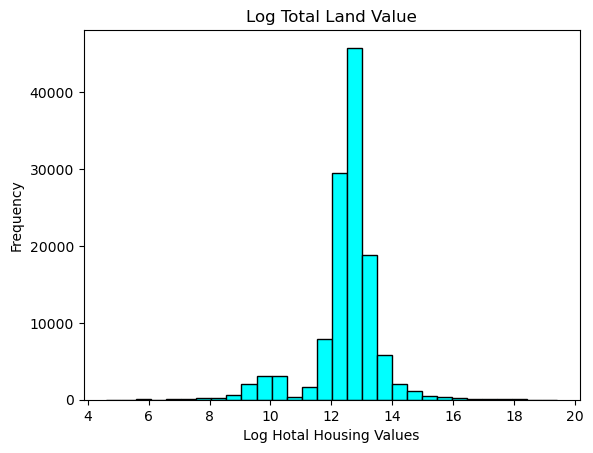

In [12]:
plt.hist(df['LOGTOTALVALUE'], bins = 30, color = 'cyan', edgecolor = 'black')
plt.xlabel('Log Hotal Housing Values')
plt.ylabel('Frequency')
plt.title('Log Total Land Value')

In [13]:
ward_df[1].describe()

,X,Y,WARD,LANDVALUE,BLDGVALUE,TOTALVALUE,PARCEL_AREA_SQFT,YEARBUILT
count,10709.000000,1.070900e+04,10712.0,1.071200e+04,1.071200e+04,1.071200e+04,1.070800e+04,10321.000000
mean,536562.389296,1.808263e+06,1.0,1.338004e+05,2.931842e+05,4.323638e+05,1.574348e+04,1930.922391
std,3389.169166,1.683217e+08,0.0,4.765016e+05,7.929016e+05,1.412636e+06,7.572586e+04,32.022020
min,526726.307541,1.718179e+05,1.0,1.000000e+02,0.000000e+00,1.000000e+02,6.600000e+01,0.000000
25%,534015.584075,1.791155e+05,1.0,7.700000e+04,1.720000e+05,2.610000e+05,5.026000e+03,1910.000000
50%,536919.501926,1.815972e+05,1.0,9.900000e+04,2.140000e+05,3.110000e+05,5.485000e+03,1925.000000
75%,539241.054529,1.851204e+05,1.0,1.150000e+05,2.630000e+05,3.660000e+05,7.320000e+03,1950.000000
max,545470.875000,1.741883e+10,1.0,2.344190e+07,3.234800e+07,1.016098e+08,3.870320e+06,2021.000000


In [14]:
ngroups = 13
bandwidth = 2

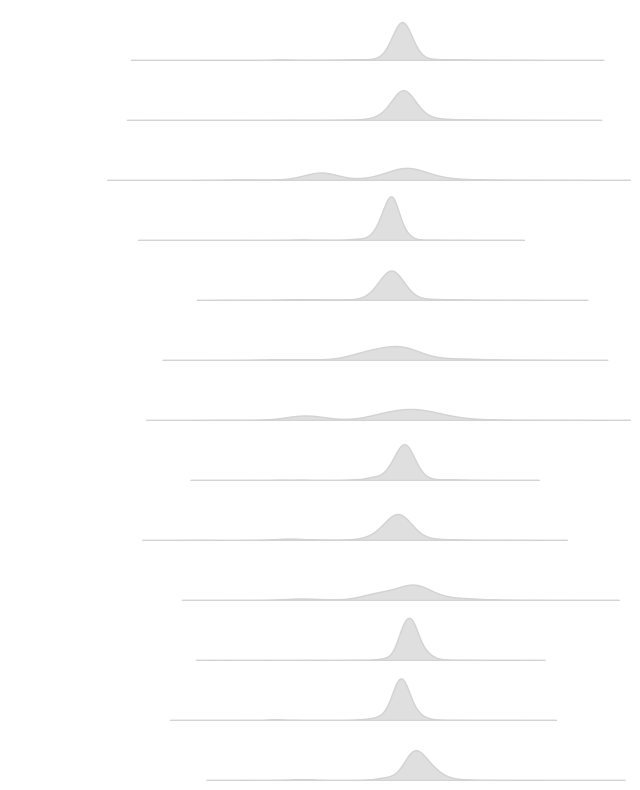

In [15]:
fig, axs = plt.subplots(nrows = ngroups, ncols = 1, figsize = (8,10))
axs = axs.flatten()

wards = [1,2,3,4,5,6,7,8,9,10,11,12,13]

for idx, ward in enumerate(wards):
    # subset the data for each ward
    subset = df[df['WARD'] == ward]

    # plot the distribution of prices
    sns.kdeplot(
        subset['LOGTOTALVALUE'],
        fill=True,
        bw_adjust = bandwidth,
        ax=axs[idx],
        color='grey',
        edgecolor = 'lightgrey'
    )

    # set title and labels
    axs[idx].set_axis_off()
    axs[idx].set_xlim(0, 20)
    axs[idx].set_ylim(0, 1.45)
    axs[idx].set_ylabel('')


plt.show()
    

In [16]:
personal_path = 'C:/Users/ashcw/Documents/Minneapolis Rent Analysis/Fira_Sans,Racing_Sans_One/Fira_Sans/' #This obviously won't work on someone else's machine

In [17]:
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)

In [18]:
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

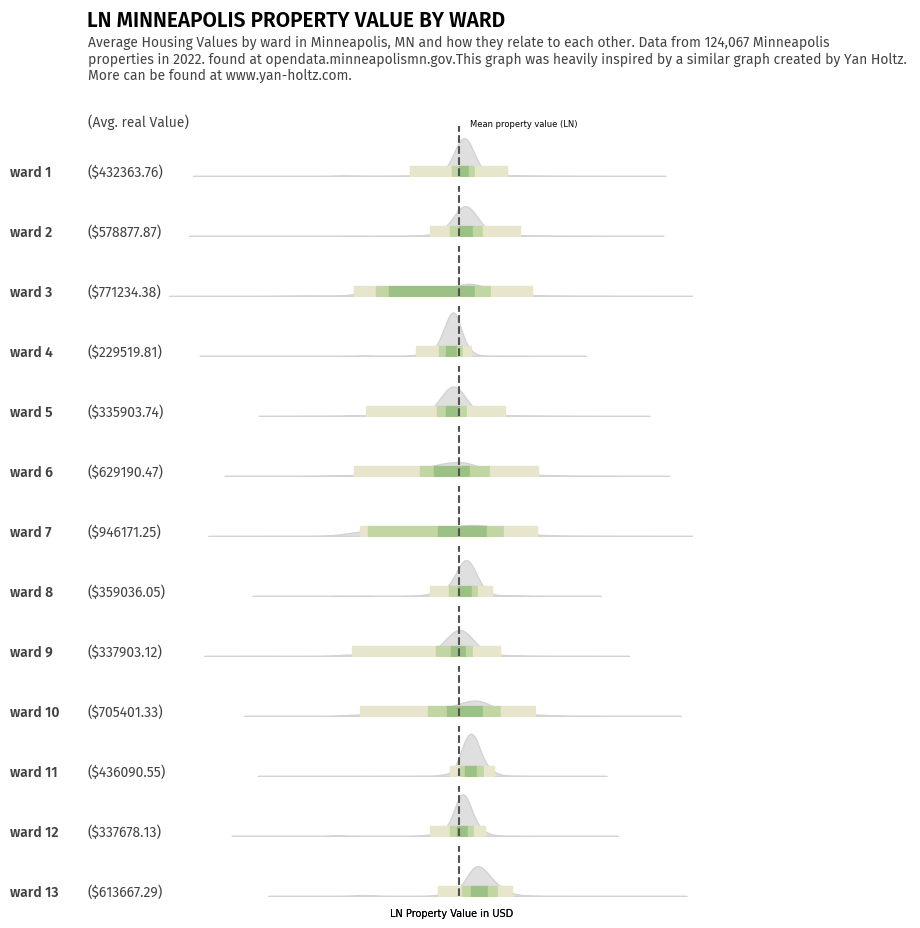

In [19]:
fig, axs = plt.subplots(nrows = ngroups, ncols = 1, figsize = (8,10))
axs = axs.flatten()

dark_green = '#9BC184'
mid_green = '#C2D6A4'
light_green = '#E7E5CB'

colors = [light_green, mid_green, dark_green, mid_green, light_green]

wards = [1,2,3,4,5,6,7,8,9,10,11,12,13]

for idx, ward in enumerate(wards):
    # subset the data for each ward
    subset = df[df['WARD'] == ward]

    # plot the distribution of prices
    sns.kdeplot(
        subset['LOGTOTALVALUE'],
        fill=True,
        bw_adjust = bandwidth,
        ax=axs[idx],
        color='grey',
        edgecolor = 'lightgrey'
    )

    #mean scatter dot
    mean = subset['LOGTOTALVALUE'].mean()
    axs[idx].scatter([mean], [0.2], color ='black', s=8)

    #global mean reference line
    minnemean = df['LOGTOTALVALUE'].mean()
    axs[idx].axvline(minnemean, color = '#525252', linestyle = '--')

    #Annotations

    #Display average total value
    av_val = subset['TOTALVALUE'].mean().round(2)
    axs[idx].text(
        .5, 0,
        f'(${av_val})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color= '#424242'
    )

    #Display ward
    axs[idx].text(
        -2, 0,
        'ward '+ str(ward),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color= '#424242'
    )

    #Display quantiles
    quantiles = np.percentile(subset['LOGTOTALVALUE'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    for j in range(len(quantiles) -1):
        axs[idx].fill_between(
            [quantiles[j], #Lower Bound
            quantiles[j + 1]], #Upper Bound
            0, #max y = 0
            0.3, # max y=0.0002
            color = colors[j]
        )
    
    # set title and labels and remove axis
    axs[idx].set_xlim(0, 20)
    axs[idx].set_ylim(0, 1.45)
    axs[idx].set_ylabel('')
    axs[idx].set_axis_off()

#Title text
text = 'LN MINNEAPOLIS PROPERTY VALUE BY WARD'
fig.text(
    .405, .98,
    text,
    ha='center',
    fontsize=15,
    fontproperties = fira_sans_semibold
)

# Average value label
text = '(Avg. real Value)'
fig.text(
    0.145, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular,
    color= '#424242'
)

#Description
text = '''Average Housing Values by ward in Minneapolis, MN and how they relate to each other. Data from 124,067 Minneapolis 
properties in 2022. found at opendata.minneapolismn.gov.This graph was heavily inspired by a similar graph created by Yan Holtz. 
More can be found at www.yan-holtz.com.
'''
fig.text(
    0.145, 0.91,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular,
    color= '#424242'
)

#reference line label
text = 'Mean property value (LN)'
fig.text(
    0.69, 0.88,
    text,
    ha='center',
    fontsize=6
)

#bottom title card
text = 'LN Property Value in USD'
fig.text(
    0.6, 0.09,
    text,
    ha='center',
    fontsize=7
)

#
text = 'LN Property Value in USD'
fig.text(
    0.6, 0.09,
    text,
    ha='center',
    fontsize=7
)

plt.savefig('../', dpi=300, bbox_inches='tight')
plt.show()
    

In [20]:
#I'm happy with this

In [22]:
df['LOGTOTALVALUE'].describe()

count    124067.000000
mean         12.494004
std           1.087399
min           4.605170
25%          12.269047
50%          12.634603
75%          12.969212
max          19.414081
Name: LOGTOTALVALUE, dtype: float64